<a href="https://colab.research.google.com/github/samikshagadhave/binary_classification/blob/main/Binary_classification_for_Good_%26_Bad_dataset_with_EfficientNetB4_model_on_T51%26T52%26T53%26T54%26T57%26T58.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive

/content/gdrive


In [ ]:
import pandas as pd

df=pd.read_excel(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train 1.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
#print(Bad_dataset)

Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/train/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train/bad_dataset/"

img_path_Good_dataset =r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


df=pd.read_excel(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test 1.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/test/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/"
img_path_Good_dataset =r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have bee

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train',
    labels='inferred',
    label_mode='int',
    batch_size=4,
    image_size=(380,380)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test',
    labels='inferred',
    label_mode='int',
    batch_size=4,
    image_size=(380,380)
)
print(train_ds)
print(validation_ds)
from tensorflow.keras.applications import EfficientNetB4
model=EfficientNetB4(weights='imagenet',include_top=False,input_shape=(380,380,3))
my_model=Sequential([model,
                     Conv2D(1024,3,1,activation='relu'),
                     GlobalAveragePooling2D(),
                     Dense(1024,activation='relu'),
                     Dropout(0.2),
                     Dense(1024,activation='relu'),
                     Dropout(0.2),
                     Dense(1,activation='sigmoid'),
                     ])

my_model.summary()




Found 198 files belonging to 2 classes.
Found 86 files belonging to 2 classes.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 380, 380, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 380, 380, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
71686520/71686520 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 12, 12, 1792)     17673823  
                                                                 
 conv2d (Conv2D)             (None, 10, 10, 1024)      16516096  
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
    

In [ ]:
train_ds=train_ds.prefetch(tf.data.AUTOTUNE)
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 380, 380, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
validation_ds=validation_ds.prefetch(tf.data.AUTOTUNE)
validation_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 380, 380, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import metrics
metrics=['accuracy']
my_model.compile(loss=BinaryCrossentropy(),optimizer=Adam(learning_rate=0.001),metrics=metrics)

In [ ]:
history=my_model.fit(train_ds,epochs=30,validation_data=validation_ds)

Epoch 1/30
50/50 [==============================] - 36s 647ms/step - loss: 0.0994 - accuracy: 0.9747 - val_loss: 0.5335 - val_accuracy: 0.7442
Epoch 2/30
50/50 [==============================] - 38s 655ms/step - loss: 0.0382 - accuracy: 0.9747 - val_loss: 6.6902 - val_accuracy: 0.5116
Epoch 3/30
50/50 [==============================] - 28s 502ms/step - loss: 0.0504 - accuracy: 0.9949 - val_loss: 6.2170 - val_accuracy: 0.5233
Epoch 4/30
50/50 [==============================] - 32s 575ms/step - loss: 0.0193 - accuracy: 0.9899 - val_loss: 5.5998 - val_accuracy: 0.5116
Epoch 5/30
50/50 [==============================] - 28s 516ms/step - loss: 0.0182 - accuracy: 0.9949 - val_loss: 13.7930 - val_accuracy: 0.4419
Epoch 6/30
50/50 [==============================] - 28s 514ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 9.0474 - val_accuracy: 0.5233
Epoch 7/30
50/50 [==============================] - 28s 525ms/step - loss: 0.0375 - accuracy: 0.9848 - val_loss: 3.7991 - val_accuracy: 0.441

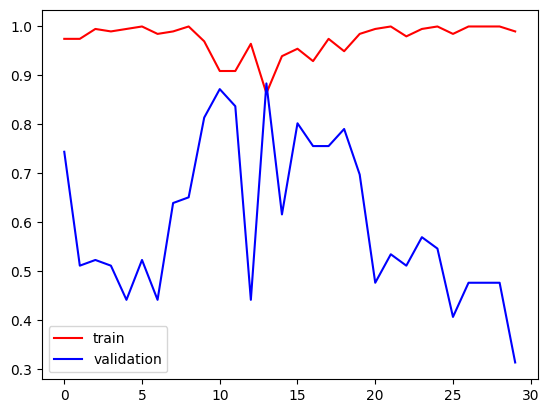

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

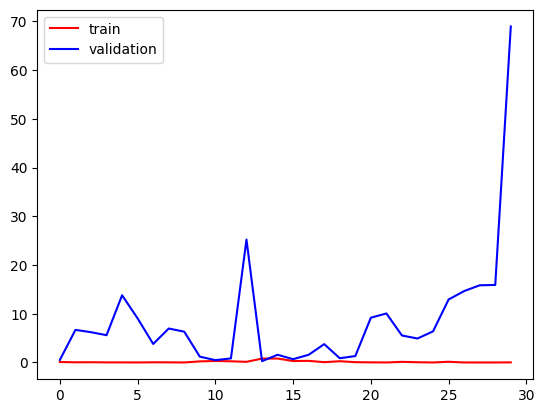

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0066.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 4s 4s/step
[[7.5200074e-07]
 [7.5200074e-07]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0108.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[5.545855e-06]
 [5.545855e-06]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0110.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 35ms/step
[[3.8197575e-07]
 [3.8197575e-07]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0489.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0491.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 37ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0493.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)
prediction>0.5

1/1 [==============================] - 0s 34ms/step
[[0.]
 [0.]]


array([[False],
       [False]])

In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0495.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)


1/1 [==============================] - 0s 35ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0497.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0499.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0501.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[3.04728e-24]
 [3.04728e-24]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0503.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 35ms/step
[[1.4779843e-05]
 [1.4779843e-05]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0505.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 36ms/step
[[0.99834895]
 [0.99834895]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0507.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0509.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0608.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 36ms/step
[[0.9530616]
 [0.9530616]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0610.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 59ms/step
[[0.98745173]
 [0.98745173]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0976.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[2.614675e-06]
 [2.614675e-06]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0978.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[0.00085713]
 [0.00085713]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0980.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[0.00466501]
 [0.00466501]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0982.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[0.9059961]
 [0.9059961]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0984.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 50ms/step
[[0.99999726]
 [0.99999726]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0986.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 50ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0869.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 50ms/step
[[0.00636399]
 [0.00636399]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0871.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0873.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0875.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[0.9999999]
 [0.9999999]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0877.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0879.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[0.99967515]
 [0.99967515]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0881.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 48ms/step
[[1.0913062e-08]
 [1.0913062e-08]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0883.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 41ms/step
[[5.0684502e-23]
 [5.0684502e-23]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0885.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[7.045766e-15]
 [7.045766e-15]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0887.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[3.03242e-20]
 [3.03242e-20]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0889.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[9.032079e-23]
 [9.032079e-23]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0891.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[1.229086e-25]
 [1.229086e-25]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0893.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[9.9212075e-21]
 [9.9212075e-21]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0895.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[5.2555874e-27]
 [5.2555874e-27]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0897.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[2.7544315e-21]
 [2.7544315e-21]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0899.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[3.4437888e-30]
 [3.4437888e-30]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0901.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[1.5025631e-09]
 [1.5025631e-09]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0903.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[0.92571366]
 [0.92571366]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0905.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 49ms/step
[[0.87448996]
 [0.87448996]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0907.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[5.1013785e-19]
 [5.1013785e-19]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0909.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 50ms/step
[[2.8503822e-26]
 [2.8503822e-26]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0911.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 49ms/step
[[1.2710936e-19]
 [1.2710936e-19]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0913.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[8.444922e-20]
 [8.444922e-20]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0915.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[5.345898e-32]
 [5.345898e-32]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0917.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[1.0085915e-33]
 [1.0085915e-33]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0919.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 35ms/step
[[1.6732492e-36]
 [1.6732492e-36]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0921.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[3.4538248e-31]
 [3.4538248e-31]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0923.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[1.2576282e-25]
 [1.2576282e-25]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0925.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 44ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0927.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 36ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0929.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 48ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0931.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 35ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0933.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 36ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0935.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 45ms/step
[[2.5114974e-38]
 [2.5114974e-38]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0937.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[1.7510442e-09]
 [1.7510442e-09]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0939.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 47ms/step
[[1.9280926e-32]
 [1.9280926e-32]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0941.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 36ms/step
[[2.8226746e-16]
 [2.8226746e-16]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0943.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 35ms/step
[[5.8471197e-15]
 [5.8471197e-15]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0945.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[4.0818696e-15]
 [4.0818696e-15]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0947.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 38ms/step
[[2.4494007e-15]
 [2.4494007e-15]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0949.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[2.9329026e-15]
 [2.9329026e-15]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0951.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 31ms/step
[[3.9649624e-27]
 [3.9649624e-27]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0953.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 50ms/step
[[3.875051e-34]
 [3.875051e-34]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0955.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 36ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0957.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 39ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0959.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0961.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0963.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[1.5816508e-38]
 [1.5816508e-38]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0965.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 66ms/step
[[0.]
 [0.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0967.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[8.478683e-28]
 [8.478683e-28]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0969.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 31ms/step
[[1.4783091e-24]
 [1.4783091e-24]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0971.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 56ms/step
[[8.5514155e-27]
 [8.5514155e-27]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0973.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[2.1782656e-25]
 [2.1782656e-25]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0975.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 48ms/step
[[2.2061403e-15]
 [2.2061403e-15]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0977.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[2.6722784e-05]
 [2.6722784e-05]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0979.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[8.2351057e-11]
 [8.2351057e-11]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0981.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[3.6123332e-10]
 [3.6123332e-10]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0983.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 35ms/step
[[0.00103394]
 [0.00103394]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0985.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[0.9930188]
 [0.9930188]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0987.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[0.16461892]
 [0.16461892]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0989.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 48ms/step
[[3.7841306e-07]
 [3.7841306e-07]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0991.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 35ms/step
[[9.611011e-14]
 [9.611011e-14]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0993.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[8.545096e-07]
 [8.545096e-07]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0995.jpg')
test_img=cv2.resize(test_img,(380,380))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[1.]
 [1.]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
truth=['bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
prediction=['bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','good','good','good','good','good','bad','bad','bad','good','good','good','bad','good','good','good','good','good','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','good','good','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','good','bad','bad','bad','bad','good']
print(classification_report(truth,prediction))
print(confusion_matrix(truth,prediction))

              precision    recall  f1-score   support

         bad       0.20      0.64      0.31        22
        good       0.53      0.14      0.22        64

    accuracy                           0.27        86
   macro avg       0.37      0.39      0.26        86
weighted avg       0.45      0.27      0.24        86

[[14  8]
 [55  9]]
